In [1]:
from py_db import *
import numpy as np
import matplotlib.pyplot as plt

# Exploring the data

The next step is to explore and analyze the data. The goal is to set tresholds for the jobs I am a good match. It's important to keep in mind that we have 5157 jobs in our database, and that for the vast majority of those jobs I am not a good fit, nor are they for me!

In [2]:
df = sql_query_to_pandas("SELECT * FROM job_labels")
cols = df.columns.drop("id")
df.shape

(5157, 6)

The function below plots a histogram and a boxplot of each one of the columns, which are great to see the distribution of the population and the average, mean, outliers, etc. for each one of the labels.

In [3]:
def plot_my_data(column:str, df:pd.core.frame.DataFrame = df):
    """
    column: str 
        Column name on the dataframe.
    df: pd.core.frame.DataFrame 
        Defaults to SELECT * FROM job_labels
    
    Prints the column name and plots a histogram and a boxplot 
    of the specified column.
    """
    data = df[column]
    bin_width = np.arange(min(data), max(data))
    print("\n", column, sep = "")
    plt.hist(data, bins = bin_width)
    plt.show()
    plt.boxplot(data)
    plt.show()


analytics


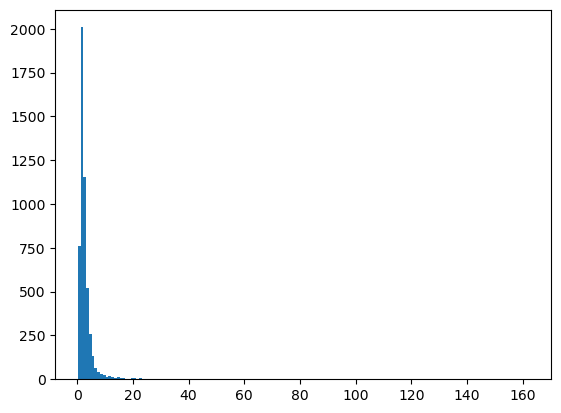

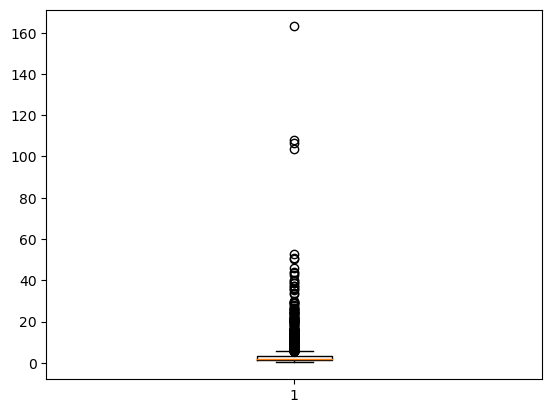


junior


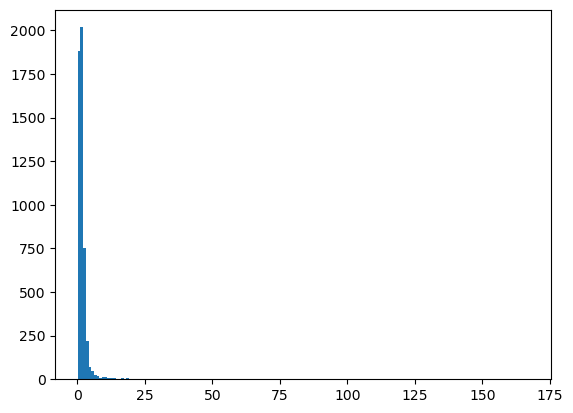

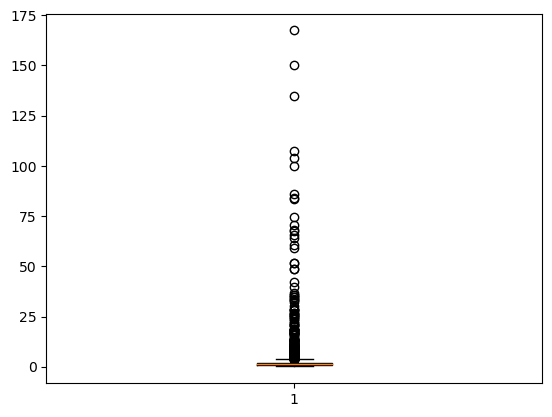


overall


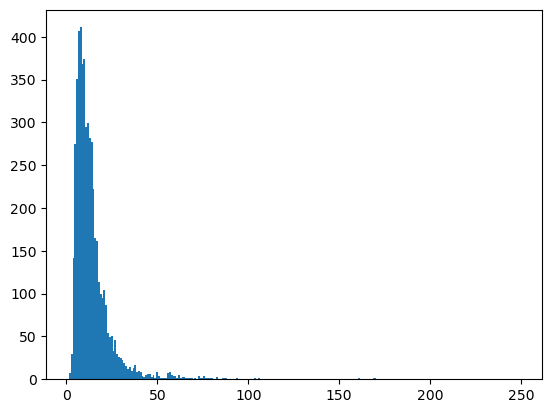

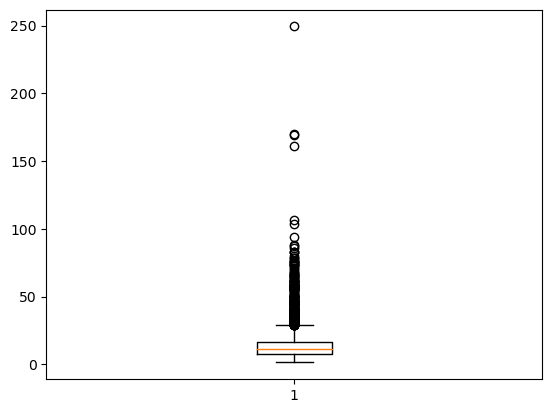


python


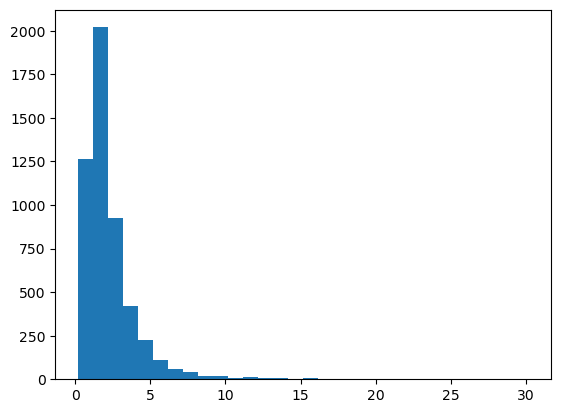

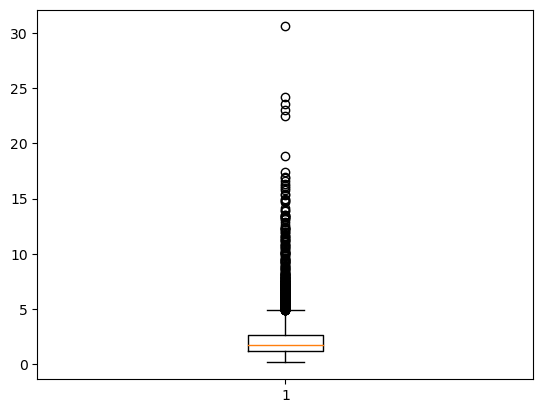


sql


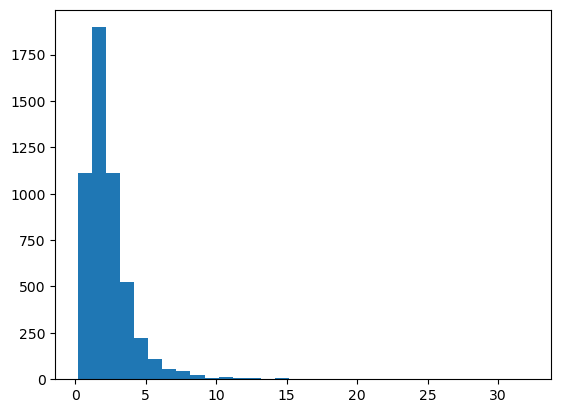

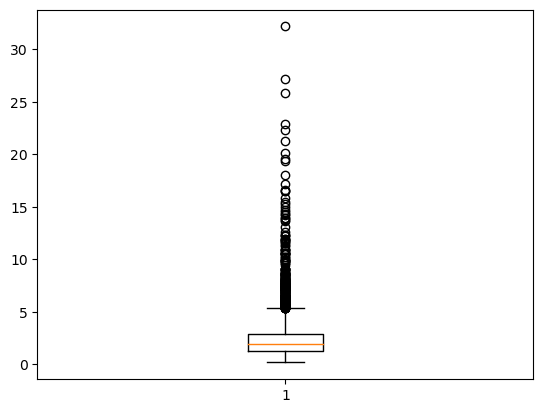

In [4]:
for col in cols:
    plot_my_data(col)

We can see a pattern here. All the distribution are asymmetrical and right skewed. Another important thing to note is that there is a high number of outliers for all the labels. 

Considering that my goal is not to spam my job application, but to apply for the jobs I am a good match, my best option here is to work with the top N percent of each label. The function below does exactly that!

In [5]:
def get_treshold(series:pd.core.series.Series, pct):
    """
    series: pandas.core.series.Series
    pct: float|int 
        Percentage for the treshold.

    return: float
    
    Takes a pandas series object and returns the treshold for 
    the top pct of the given series sorted in descending order.
    """
    sorted_df = series.sort_values(ascending = False)
    top_percent = int(pct/100*len(sorted_df))
    return min(sorted_df[:top_percent])

In [6]:
pct_jobs = 10

With the function below, we create a dictionary with the values that correspond to the scores for the treshold of the top 10% jobs for each label.

In the loop below we can see how many jobs we'd be applying using these tresholds!

In [7]:
tresholds = {col:get_treshold(df[col], pct_jobs) for col in cols}
print(tresholds)

{'analytics': 4.8904900635465705, 'junior': 3.1070714125413645, 'overall': 23.849699352284624, 'python': 4.214685178348596, 'sql': 4.163718260119916}


In [8]:
top_junior_df = df[df["junior"] > tresholds["junior"]]
for col in cols.drop("junior"):
    tot_jobs = top_junior_df[top_junior_df[col] > tresholds[col]].shape[0]
    pct = round(tot_jobs / df.shape[0] * 100, 1)
    print(f"There's {tot_jobs} jobs for {col} that meet the criteria, which is {pct}% of the total jobs.")

There's 150 jobs for analytics that meet the criteria, which is 2.9% of the total jobs.
There's 134 jobs for overall that meet the criteria, which is 2.6% of the total jobs.
There's 106 jobs for python that meet the criteria, which is 2.1% of the total jobs.
There's 114 jobs for sql that meet the criteria, which is 2.2% of the total jobs.


The idea now is to filter the positions that are for Junior data scientists or analysts, and out of these filter out again all the positions that don't match my requirements. 
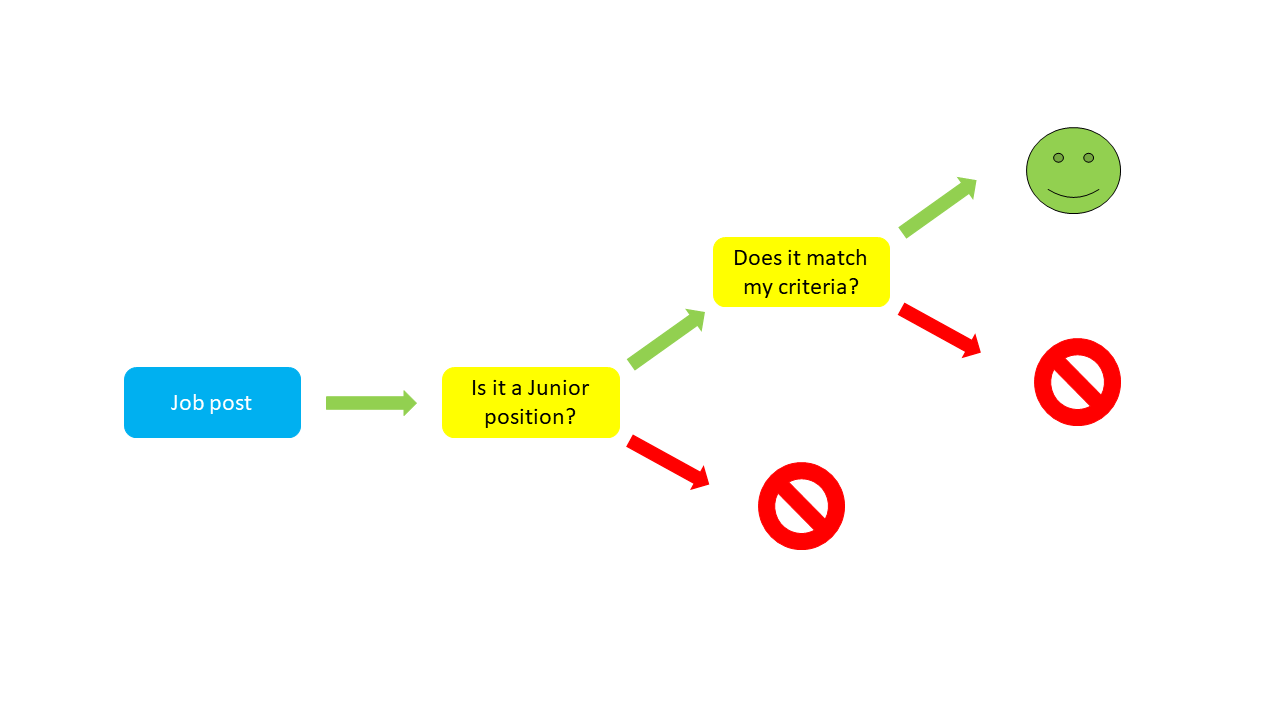
Since we will use these figures later on, we'll store them in a json file!

In [9]:
with open("tresholds.json", "w") as f:
    json.dump(tresholds, f)